In [5]:
from SeismicReduction import *
import pickle
import torch.nn as nn

# load data
file_pi2 = open('./pickled/data.pickle', 'rb')
dataholder = pickle.load(file_pi2)
file_pi2.close()

In [7]:
### Processor
processor = Processor(dataholder)
input1 = processor(flatten=[True, 12, 52], normalise=True)

Processor has created an output with shape:  (25351, 2, 64)


In [8]:
bvae = BVaeModel(input1)

ModelAgent initialised


In [103]:
import copy 

betas = [0.01, 0.1, 0.5, 1, 2, 3, 4, 4.5, 5, 6, 7, 8, 9, 10]

models = [i for i in range(len(betas))]
ELBO = [i for i in range(len(betas))]

for count, i in enumerate(betas):
        bvae.reduce(epochs=20, hidden_size=2, lr=0.005, beta=i, plot_loss=False)
        bvae.to_2d()
        model = copy.deepcopy(bvae)
        models[count] = model
        print(count + 1, '/', len(betas))

/anaconda3/lib/python3.6/site-packages/torch/nn/_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


NOTE: embedding already reduced to 2D latent space, UMAP will not be run
1 / 14
NOTE: embedding already reduced to 2D latent space, UMAP will not be run
2 / 14
NOTE: embedding already reduced to 2D latent space, UMAP will not be run
3 / 14
NOTE: embedding already reduced to 2D latent space, UMAP will not be run
4 / 14
NOTE: embedding already reduced to 2D latent space, UMAP will not be run
5 / 14
NOTE: embedding already reduced to 2D latent space, UMAP will not be run
6 / 14
NOTE: embedding already reduced to 2D latent space, UMAP will not be run
7 / 14
NOTE: embedding already reduced to 2D latent space, UMAP will not be run
8 / 14
NOTE: embedding already reduced to 2D latent space, UMAP will not be run
9 / 14
NOTE: embedding already reduced to 2D latent space, UMAP will not be run
10 / 14
NOTE: embedding already reduced to 2D latent space, UMAP will not be run
11 / 14
NOTE: embedding already reduced to 2D latent space, UMAP will not be run
12 / 14
NOTE: embedding already reduced to 2D

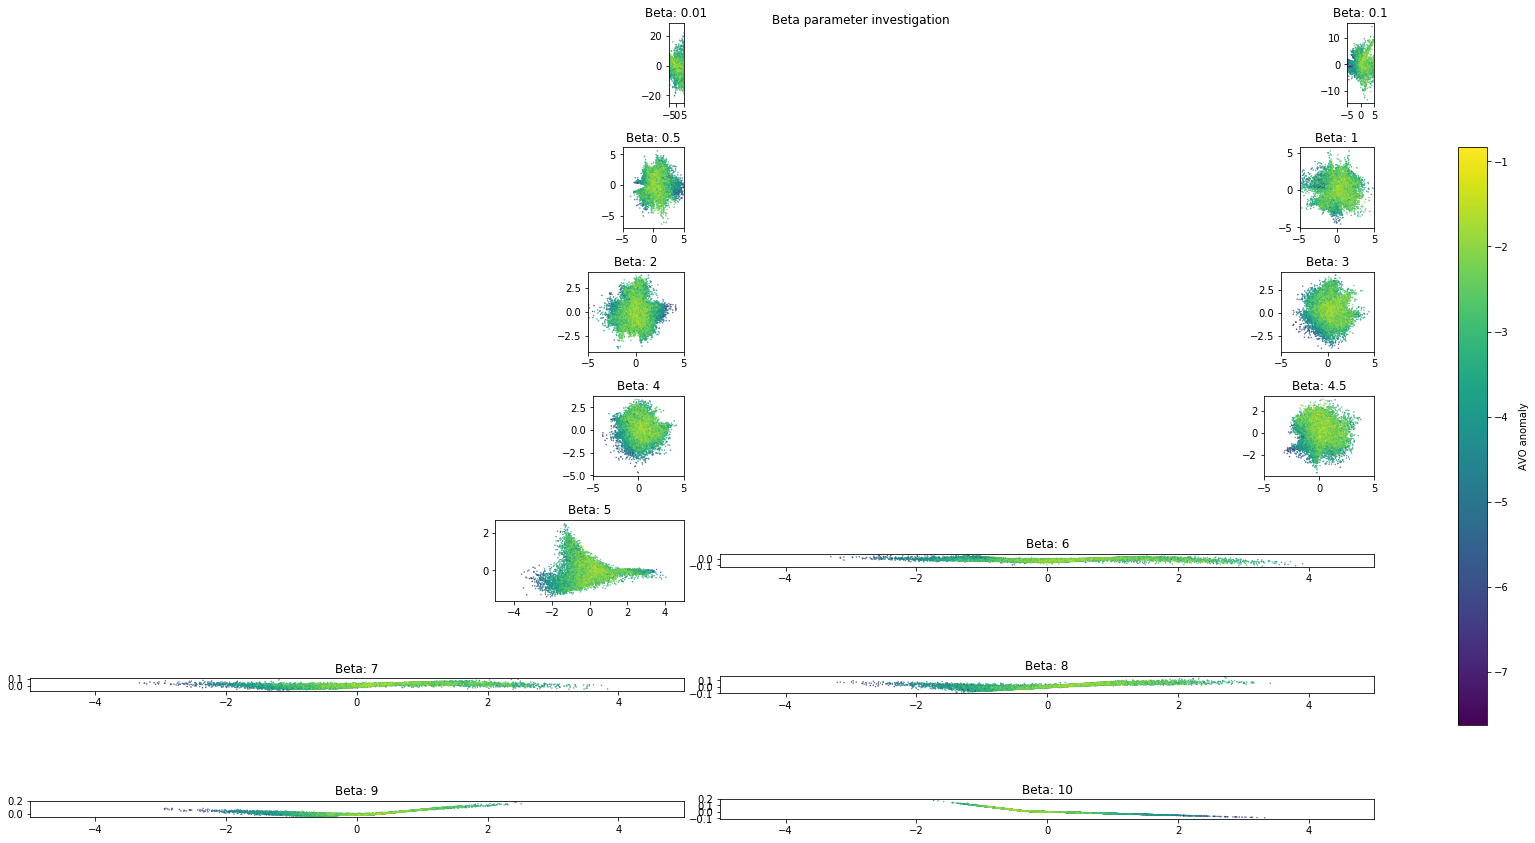

In [104]:
def plot_agent(model, attr='FF', ax=False, count=False):
    ax.set(title='Beta: {}'.format(betas[count]),
           aspect='equal', xlim=(-5, 5) )

    
    scatter = ax.scatter(model.two_dimensions[:, 0], model.two_dimensions[:, 1],
                         s=0.2,
                         c=model.attributes[attr])

    return scatter


# axes are in a two-dimensional array, indexed by [row, col]
fig, ax = plt.subplots(len(betas)//2, 2, figsize=(24, 12), sharex=False, sharey=False)


fig.suptitle('Beta parameter investigation')
fig.frameon = True

for count, i in enumerate(betas):
    a = plot_agent(models[count], ax=ax[int(count//2),int(count%2)], count=count)

fig.tight_layout()
cbar = fig.colorbar(a, ax=ax.ravel().tolist(), shrink=0.7, orientation='vertical')
cbar.set_label(label='AVO anomaly', rotation=90, labelpad=10)


plt.show()

9
10
11
12
13


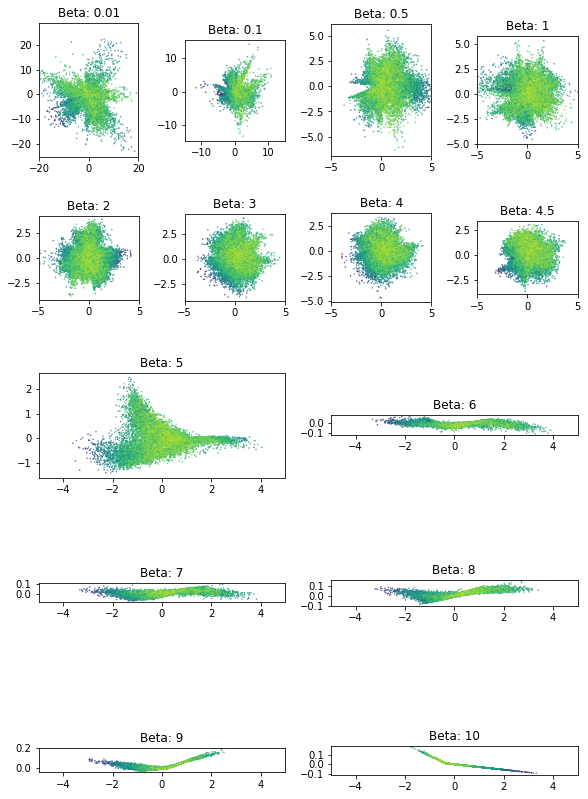

In [109]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec


def format_axes(fig):
    for i, ax in enumerate(fig.axes):
#         ax.text(0.5, 0.5, "ax%d" % (i+1), va="center", ha="center")
#         ax.tick_params(labelbottom=False, labelleft=False)
        plot_agent(models[i], ax=ax, count=i)
#         if i < 3:
#             ax.set_xlim(-20,20)
        if i > 8:
            print(i)
            ax.set_aspect(4)

fig = plt.figure(constrained_layout=False, figsize=(8.27, 11.69))

gs = GridSpec(5, 4, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[0, 3])
ax5 = fig.add_subplot(gs[1, 0])
ax6 = fig.add_subplot(gs[1, 1])
ax7 = fig.add_subplot(gs[1, 2])
ax8 = fig.add_subplot(gs[1, 3])

ax13 = fig.add_subplot(gs[2, :2])
ax14 = fig.add_subplot(gs[2, 2:])
ax15 = fig.add_subplot(gs[3, :2])
ax16 = fig.add_subplot(gs[3, 2:])
ax17 = fig.add_subplot(gs[4, :2])
ax18 = fig.add_subplot(gs[4, 2:])


format_axes(fig)
ax1.set_xlim(-20,20)
ax2.set_xlim(-15,15)

fig.tight_layout()

plt.show()
plt.savefig('./images/beta_param.png')
fig.savefig()

In [88]:
from SeismicReduction import plot_agent as pa

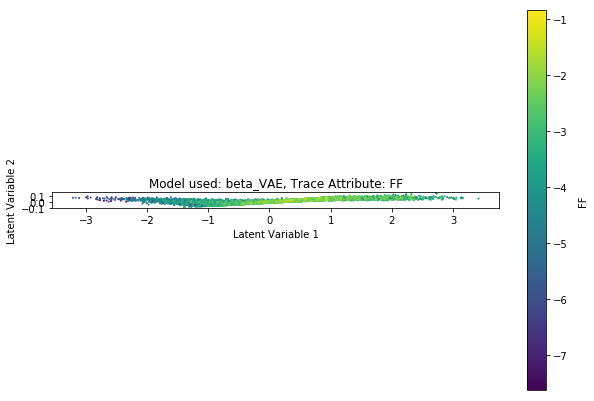

In [98]:
pa(models[-3])

In [118]:
!ls
fig.savefig('./images/beta_param.png', quality=95, papertype='a4', edgecolor='black', facecolor='lightgrey')

GUI_from_pip                       SeismicReduction
GUI_tool.ipynb                     __pycache__
Investigate beta.ipynb             data
Investigate umap.ipynb             dist
LICENSE                            docs
MANIFEST                           images
Old_Notebooks                      pickled
Optimise latent size.ipynb         requirements.txt
Optimise optimiser.ipynb           saved_nn
Optimise train split.ipynb         setup.cfg
Optimise vae channels big.ipynb    setup.py
Optimise vae channels normal.ipynb test_cases
Optimise vae channels small.ipynb  test_integration.py
README.md                          test_units.py
Run_scripts.ipynb
